In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [4]:
df=pd.read_csv(r"E:\DataScience-data\combined_cycle_power_plant.csv",sep=';')

In [5]:
df.shape

(9568, 5)

In [6]:
df.columns

Index(['temperature', 'exhaust_vacuum', 'ambient_pressure',
       'relative_humidity', 'energy_output'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperature        9568 non-null   float64
 1   exhaust_vacuum     9568 non-null   float64
 2   ambient_pressure   9568 non-null   float64
 3   relative_humidity  9568 non-null   float64
 4   energy_output      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [8]:
df.describe()

,temperature,exhaust_vacuum,ambient_pressure,relative_humidity,energy_output
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [9]:
df.isnull().sum()

temperature          0
exhaust_vacuum       0
ambient_pressure     0
relative_humidity    0
energy_output        0
dtype: int64

In [10]:
df.dtypes

temperature          float64
exhaust_vacuum       float64
ambient_pressure     float64
relative_humidity    float64
energy_output        float64
dtype: object

In [11]:
df.head()

,temperature,exhaust_vacuum,ambient_pressure,relative_humidity,energy_output
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58


In [12]:
con=['temperature', 'exhaust_vacuum', 'ambient_pressure','relative_humidity']

In [21]:
conn=df.select_dtypes(include='float').columns.tolist()
conn

['temperature',
 'exhaust_vacuum',
 'ambient_pressure',
 'relative_humidity',
 'energy_output']

In [16]:
conn

['temperature',
 'exhaust_vacuum',
 'ambient_pressure',
 'relative_humidity',
 'energy_output']

In [17]:
import seaborn as sns

C:\Users\aspdiscovery\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


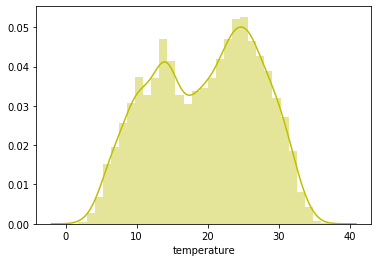

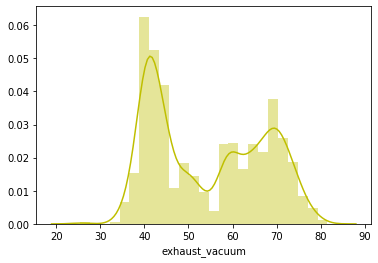

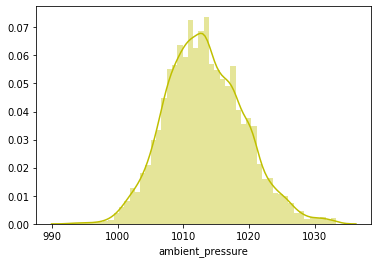

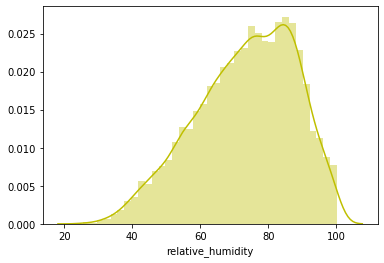

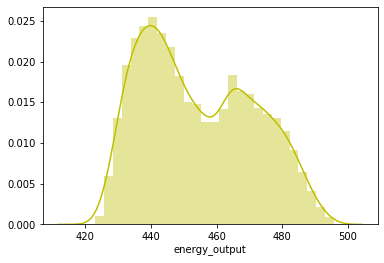

In [22]:
for i in conn:
    sns.distplot(df[i],color='y')
    plt.show()
    

In [23]:
df.corr()

,temperature,exhaust_vacuum,ambient_pressure,relative_humidity,energy_output
temperature,1.000000,0.844107,-0.507549,-0.542535,-0.948128
exhaust_vacuum,0.844107,1.000000,-0.413502,-0.312187,-0.869780
ambient_pressure,-0.507549,-0.413502,1.000000,0.099574,0.518429
relative_humidity,-0.542535,-0.312187,0.099574,1.000000,0.389794
energy_output,-0.948128,-0.869780,0.518429,0.389794,1.000000


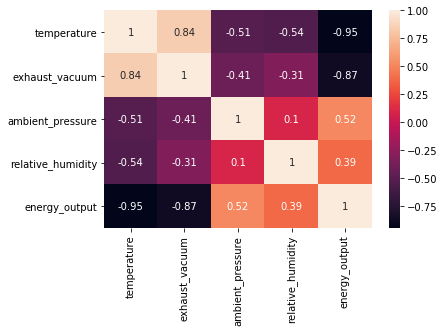

In [24]:
sns.heatmap(df.corr(),annot=True)

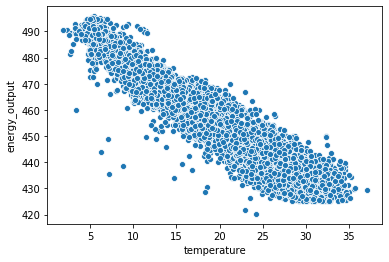

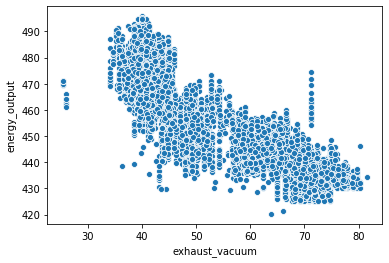

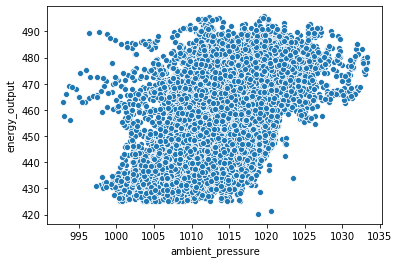

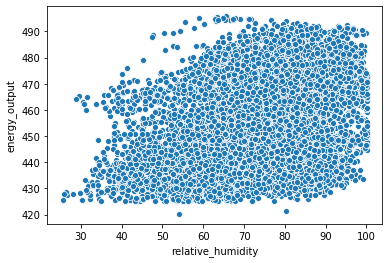

In [25]:
for i in con:
    sns.scatterplot(x=i,y='energy_output',data=df)
    plt.show()

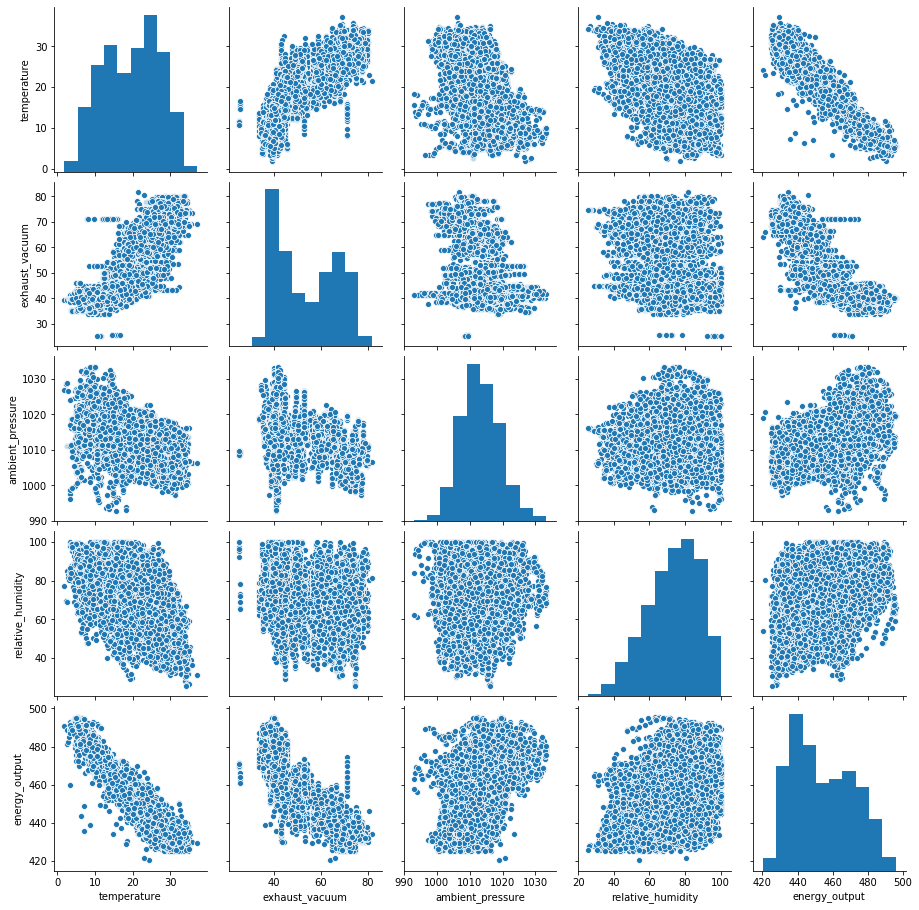

In [26]:
sns.pairplot(df)
plt.show()

In [27]:
x=df.drop("energy_output",axis=1)
y=df['energy_output']

In [31]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=4)

In [32]:
print(xtest.shape)
print(xtrain.shape)
print(ytest.shape)
print(ytrain.shape)

(1914, 4)
(7654, 4)
(1914,)
(7654,)


In [33]:
algo=LinearRegression()
algo.fit(xtrain,ytrain)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
algo.intercept_


459.0559902885966

In [35]:
algo.coef_

array([-1.98249982, -0.23469124,  0.05802625, -0.16008487])

In [36]:
from sklearn.metrics import mean_squared_error

In [47]:
xtest.head()

,temperature,exhaust_vacuum,ambient_pressure,relative_humidity
8164,26.94,71.14,1011.63,62.74
3894,14.97,58.20,1019.52,81.13
6322,27.03,71.14,1010.33,66.25
1668,24.01,60.84,1018.83,63.82
8818,25.02,69.75,1010.04,91.86


In [37]:
ypred=algo.predict(xtest)


In [38]:
mean_squared_error(ytest,ypred)

22.402643253737384

In [39]:
ytest[:5]

8164    434.03
3894    458.68
6322    430.41
1668    436.32
8818    437.87
Name: energy_output, dtype: float64

In [40]:
ypred[:5]

array([437.60888565, 461.89017938, 436.79312863, 446.07982722,
       436.98757284])

In [41]:
import joblib

In [43]:
joblib.dump(algo,"E:\DataScience-data\linearmodel.pkl")

['E:\\DataScience-data\\linearmodel.pkl']